In [29]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
import sys
sys.path.insert(0, "../src")

In [31]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

In [32]:
import data_utils
import fields
import variogram as vgm
import cov_model
import plot

# Figure 1: daily and monthly climatologies

In [5]:
with xr.open_dataset("../data/exp_pro/OCO2_Lite_XCO2.nc") as ds:
    ds_xco2 = ds["xco2"]
    
with xr.open_dataset("../data/exp_pro/OCO2_Lite_SIF740.nc") as ds:
    ds_sif = ds["sif"]

In [6]:
daily_xco2 = data_utils.produce_climatology_conus(ds_xco2, "1D")
daily_sif = data_utils.produce_climatology_conus(ds_sif, "1D")
df_daily = pd.merge(daily_xco2, daily_sif, on=["time"], how="outer")

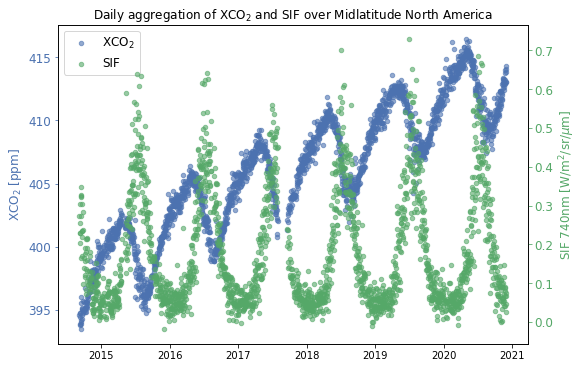

In [7]:
# Plot regional daily climatology
title = "Daily aggregation of XCO$_2$ and SIF over Midlatitude North America"
fname = "daily_climatology_conus"
plot.raw_climatology(df_daily, title, filename=fname)

# Figure 2: gridded datasets

In [33]:
ds = xr.open_dataset("../data/exp_pro/OCO2_4x5deg_monthly_conus_augmented.nc")

# Format as multi-fields
ds_xco2 = ds[["xco2", "xco2_var"]]
ds_sif = ds[["sif", "sif_var"]]

var_names = ["xco2", "sif"]
cross_name = "xco2:sif"

In [43]:
# Analysis variables
month = 8
timedelta = -2
n_bins = 60
fast_dist = True

timestamps = np.array(ds.time[ds.time.dt.month == month].values, dtype="datetime64[D]")
timestamp = timestamps[0]

params_guess = [1.0, 1.5, 700, 0.0, 1.5, 700, -0.8, 1.0, 1.5, 700, 0.0]

In [44]:
timestamp

numpy.datetime64('2015-08-01')

In [45]:
mf = fields.MultiField(ds_xco2, ds_sif, timestamp, timedelta=timedelta, fast_dist=fast_dist)

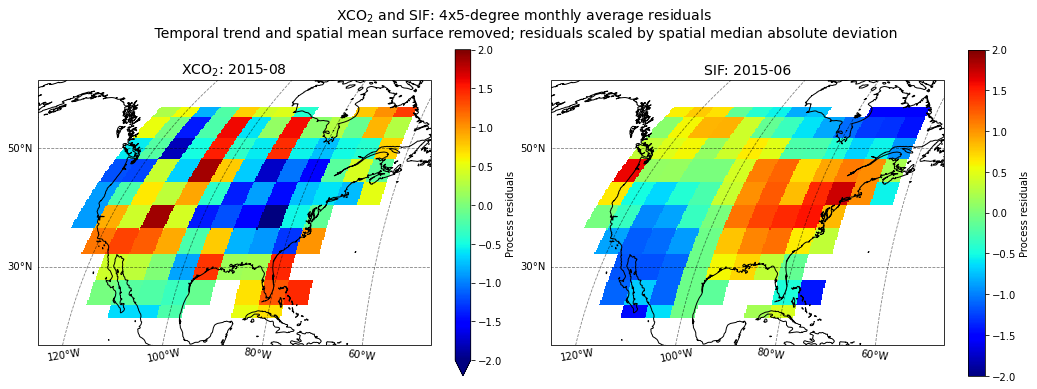

In [48]:
fname = "gridded_residuals"
plot.plot_fields(mf, filename=fname)

# Figure 3 & 4: fitted semivariograms and covariograms

In [40]:
# Initialize Matern model
k1 = cov_model.Matern()
k2 = cov_model.Matern()

In [41]:
model = cov_model.BivariateMatern(mf, k1, k2)
vario_res, covario_res, params_fit = model.empirical_variograms(params_guess, n_bins=n_bins)

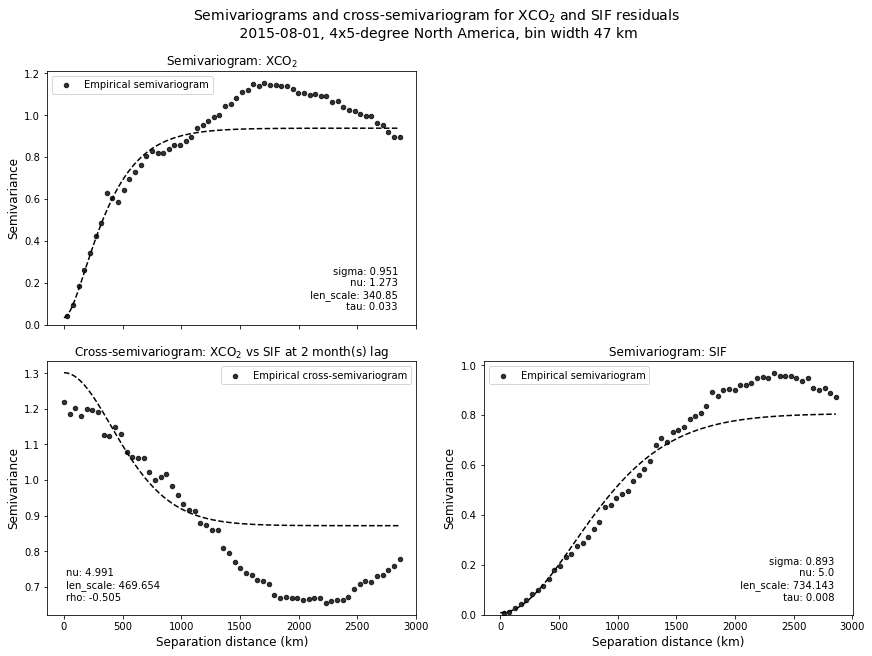

In [42]:
fname = f"semivariograms_conus4x5_{timestamp}_{np.abs(timedelta)}Mlag"
plot.plot_semivariograms(vario_res, timestamp, timedelta, params=params_fit)

## Additional Figures

In [17]:
def plotting_wrapper(timestamp):
    k1 = cov_model.Matern()
    k2 = cov_model.Matern()
    
    mf = fields.MultiField(ds_xco2, ds_sif, timestamp, timedelta=timedelta, fast_dist=fast_dist)
    model = cov_model.BivariateMatern(mf, k1, k2)
    vario_res, covario_res, params_fit = model.empirical_variograms(params_guess, n_bins=n_bins)

    fname = f"semivariograms_conus4x5_{timestamp}_{np.abs(timedelta)}Mlag"
    plot.plot_semivariograms(vario_res, timestamp, timedelta, params=params_fit, filename=fname)

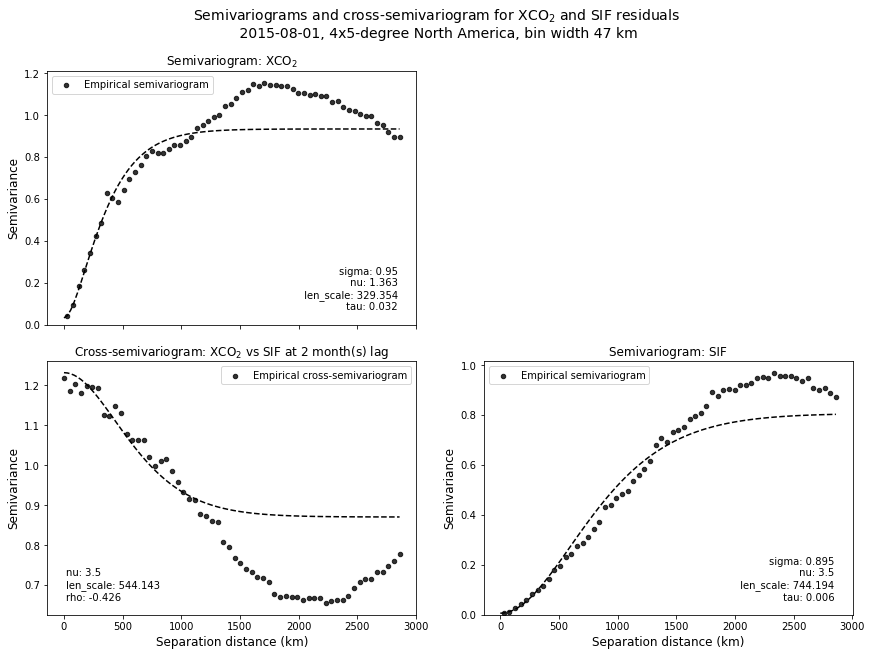

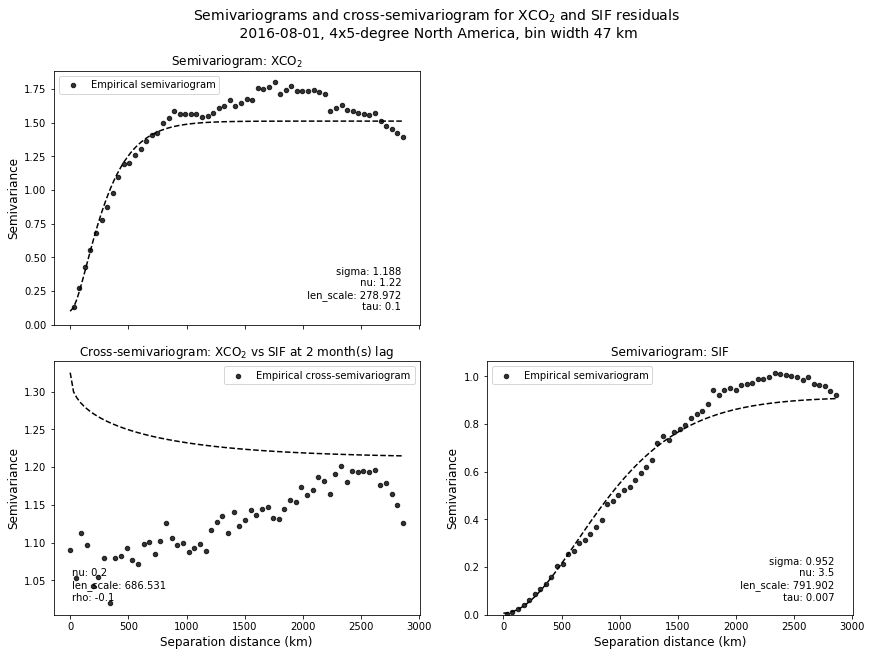

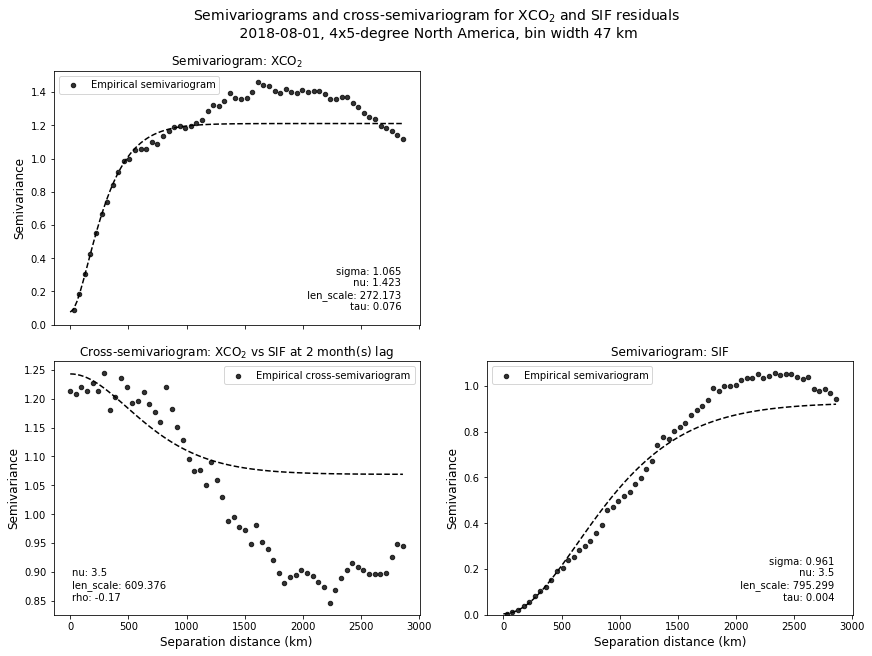

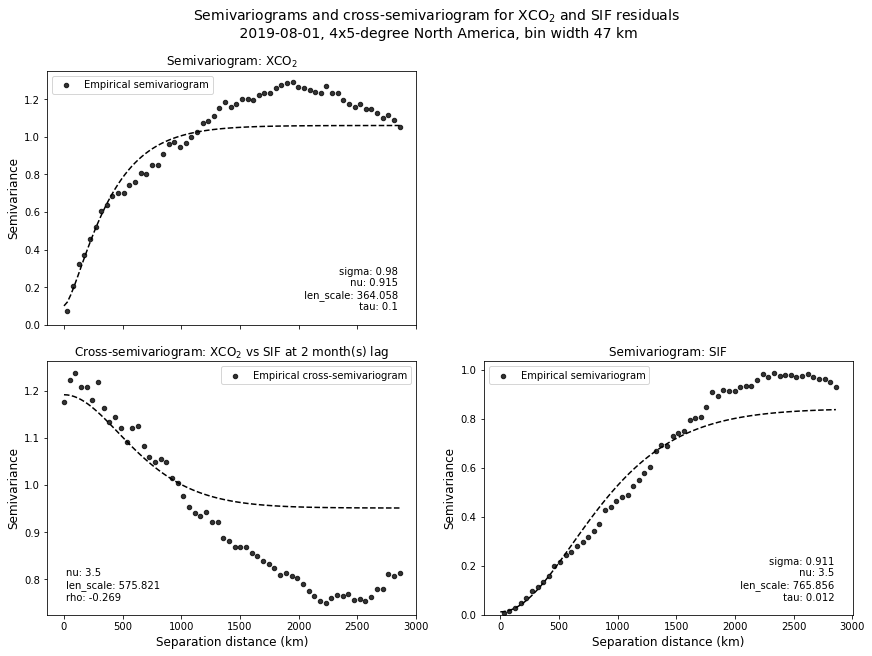

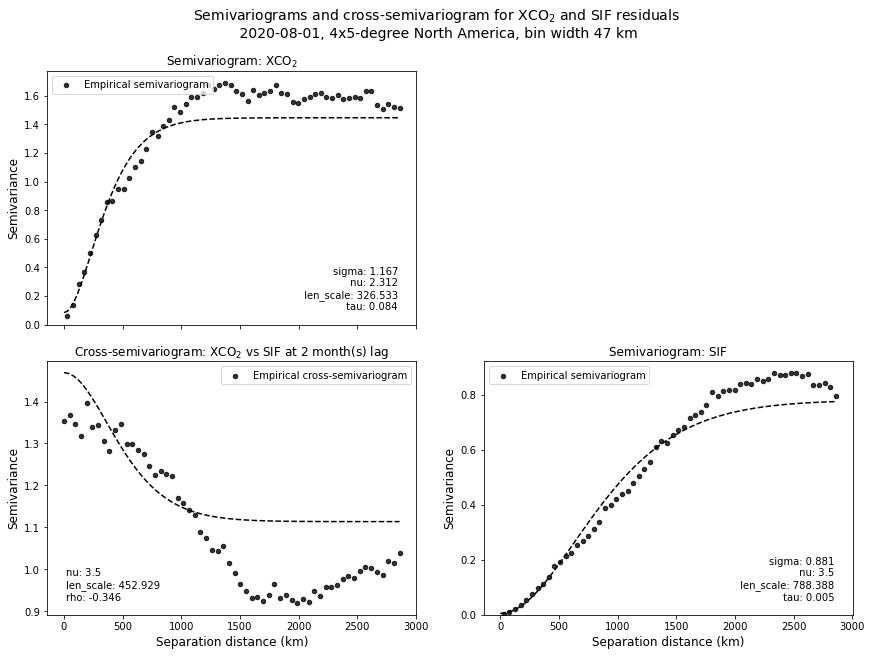

In [27]:
# 2-month lag
month = 8
timedelta = -2
timestamps = np.array(ds.time[ds.time.dt.month == month].values, dtype="datetime64[D]")

[plotting_wrapper(timestamp) for timestamp in np.delete(timestamps, 2)];

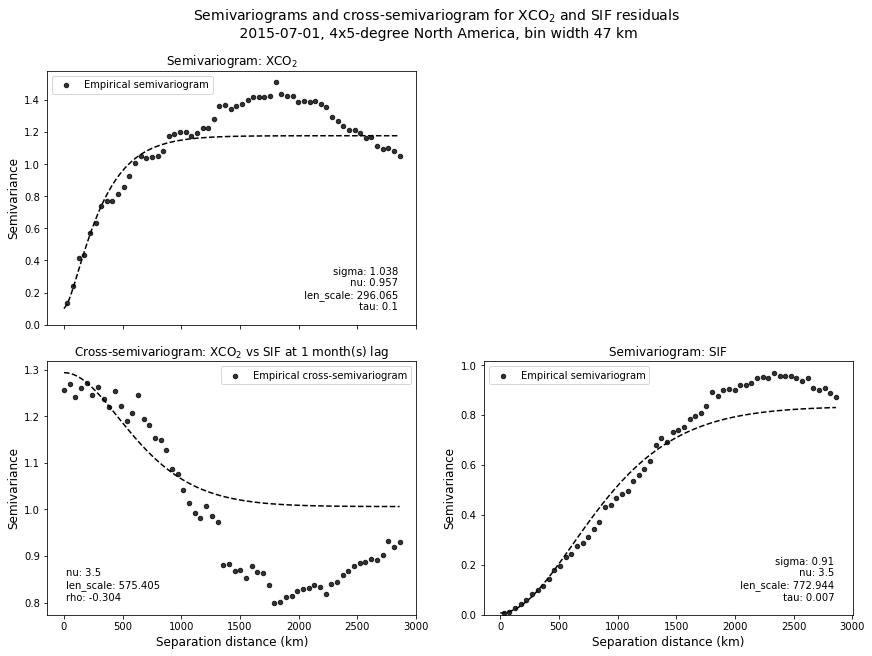

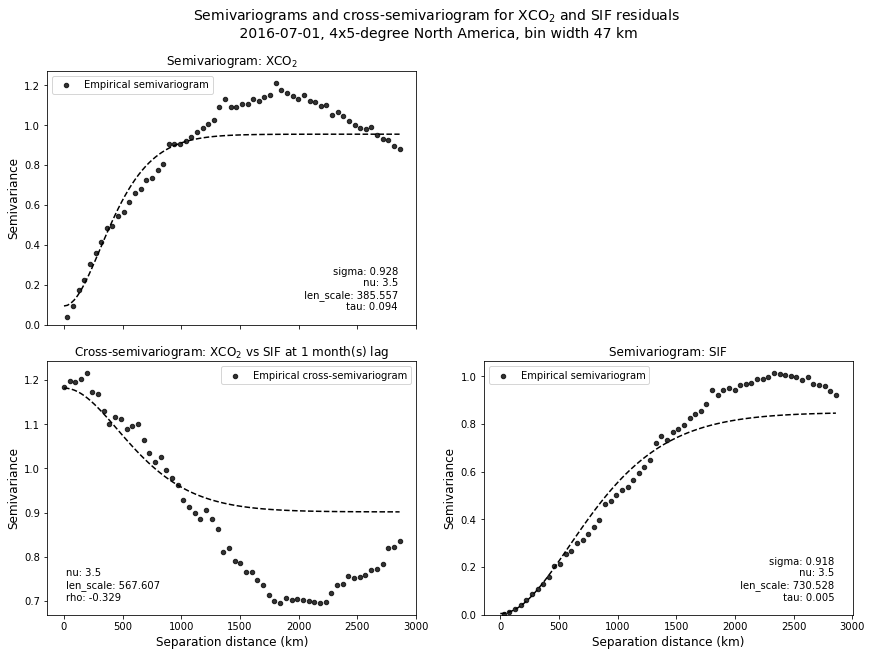

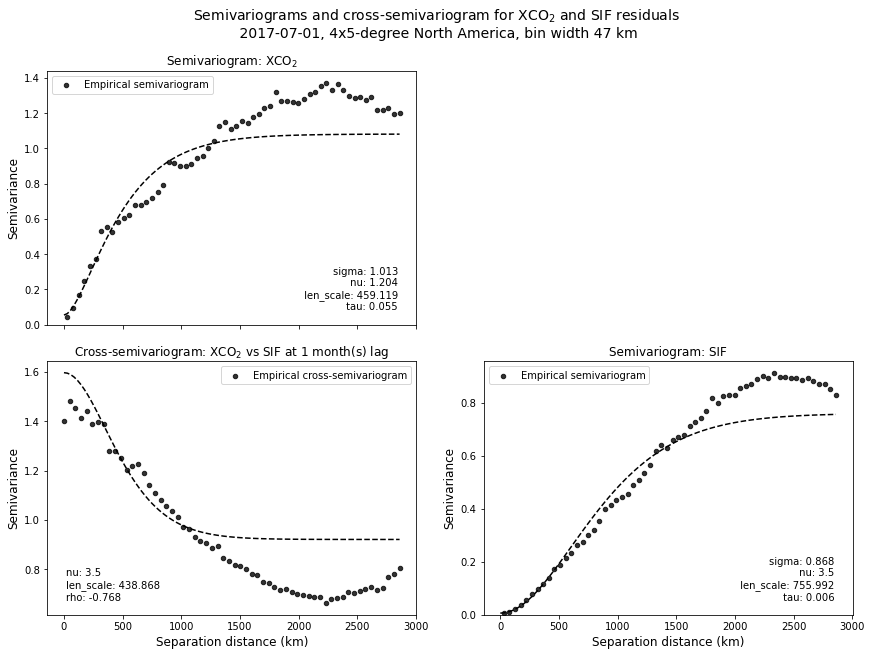

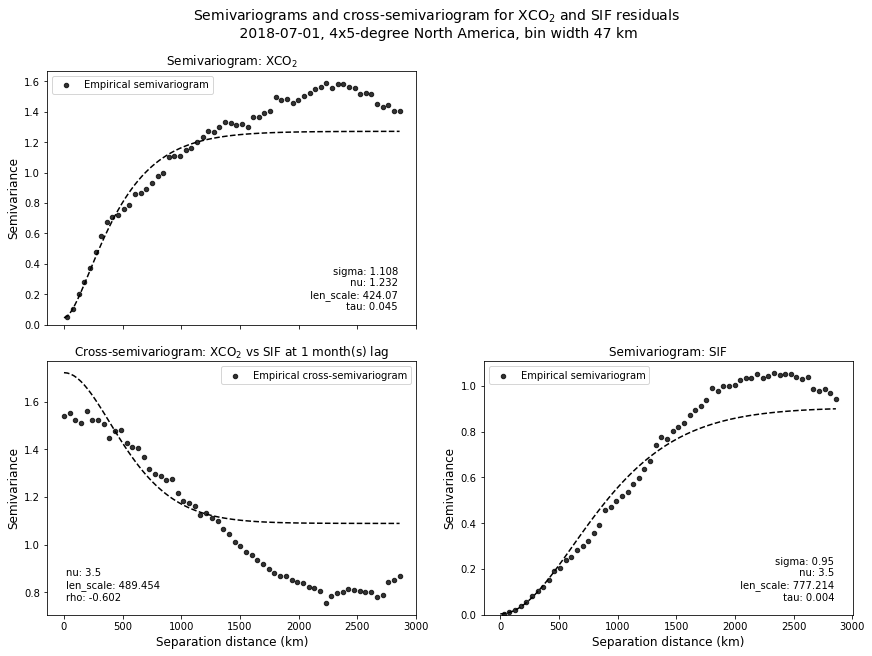

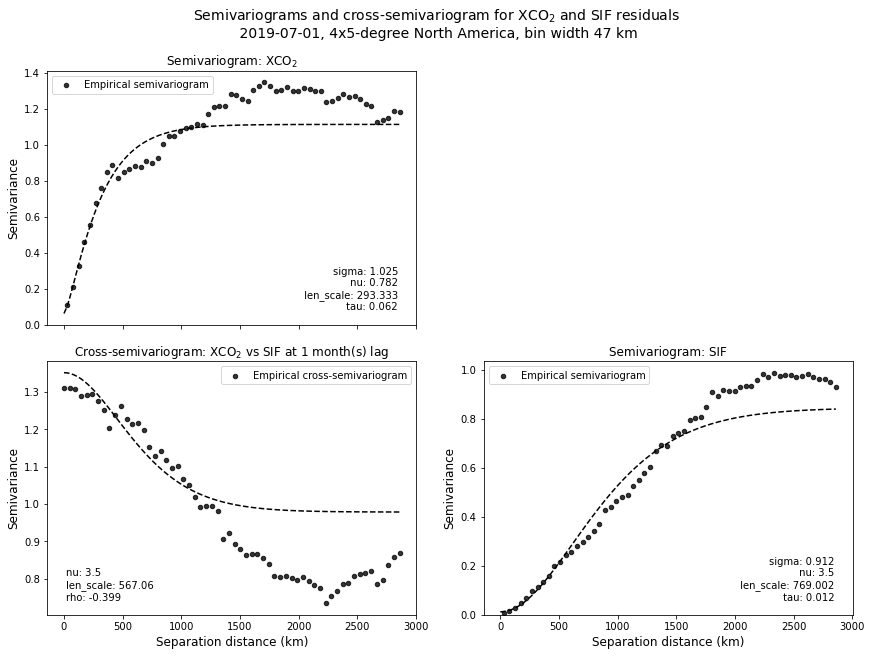

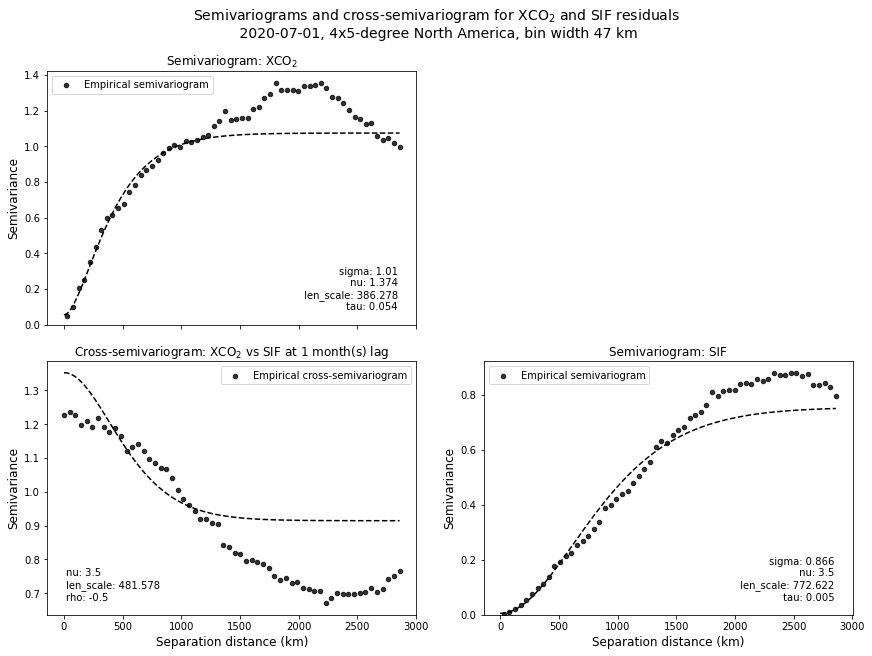

In [28]:
# 1-month lag
month = 7
timedelta = -1
timestamps = np.array(ds.time[ds.time.dt.month == month].values, dtype="datetime64[D]")

[plotting_wrapper(timestamp) for timestamp in timestamps];